# Declaration of Originality

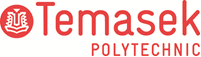

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Dylan Yeo Wen Feng
* Tutorial Group                : TC02
* Tutor						    : Ms Ester Goh
* Submission Date               : 10/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [57]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

# 1. Business Understanding

The Credit Card Default Dataset contains information on 30,000 credit card clients, including their demographic profiles, credit limits, billing statements, repayment history, and previous payment behaviour. Each record represents a snapshot of a customer’s financial status and repayment behaviour over recent billing cycles.

The goal of this project is to develop a machine learning model for binary classification that predicts the likelihood of a credit card customer defaulting on their next payment (default payment next month).

By accurately identifying high-risk customers in advance, the model can support financial institutions in:
- Reducing potential financial losses
- Improving credit risk management
- Making data-driven decisions on credit limits and intervention strategies

As the dataset exhibits class imbalance, evaluation metrics beyond accuracy are required. Metrics such as precision, recall, F1-score, and ROC-AUC are used to better assess model performance, with recall being particularly important, as failing to identify a defaulting customer may result in financial loss.

The model is intended as a decision-support tool and assumes that historical repayment behaviour is indicative of future default risk, using only information available prior to the prediction period.

# 2. Data Understanding

## 2.1 Load dataset

| Column | Units | Description |
|--------|-------|-------------|
| LIMIT_BAL | NTD | Total credit limit granted to the customer, including both the customer’s own credit and any supplementary (family) credit under the same account |
| SEX | 1 = male; 2 = female | Gender |
| EDUCATION | 1 = graduate school; 2 = university; 3 = high school; 4 = others | Education Status |
| MARRIAGE | 1 = married; 2 = single; 3 = others | Marital status |
| AGE | years | Age of individual |
| PAY_0 - PAY_6 | -1 = pay duly; Otherwise its number of months overdue | These represent the number of months a payment has been missed |
| BILL_AMT1 - BILL_AMT6 | NTD | Amount payable in that month |
| PAY_AMT1 - PAY_AMT6 | NTD | Amount that was paid in that month |
| default payment next month | 1 = defaulted; 0: not defaulted | Defeault result of the individual |

| Timeframe | Description |
|-----------|-------------|
| Sept 2005 | BILL_AMT1, PAY_AMT1 |
| Aug 2005 | BILL_AMT2, PAY_AMT2 |
| July 2005 | BILL_AMT3, PAY_AMT3 |
| June 2005 | BILL_AMT4, PAY_AMT4 | 
| May 2005 | BILL_AMT5, PAY_AMT5 |
| April 2005 | BILL_AMT6, PAY_AMT6 |

In [4]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "default-of-credit-card-clients.xlsx"
df = pd.read_excel(FILE_PATH, header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## 2.2 Summary Statistics

In [6]:
## Understand the type of variable for each column
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [7]:
## Check for missing data
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# Show summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
# Show unique values in categorical columns
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())



SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

PAY_0:
PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

PAY_2:
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

PAY_3:
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

PAY_4:
PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

PAY_5:
PAY_5
 0    16947
-1     5539
-

## Findings and Explanation of sumary statistics

The data types of each column were examined to distinguish between numerical and categorical variables. A check for missing values shows that the dataset does not contain any null entries, indicating complete records for all customers. Summary statistics reveal that financial variables such as credit limits, bill amounts, and payment amounts span wide ranges, suggesting the presence of skewed distributions. In contrast, demographic variables such as age, gender, education level, and marital status exhibit more limited and discrete value ranges. These observations provide an initial understanding of the dataset and inform subsequent exploratory analysis.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

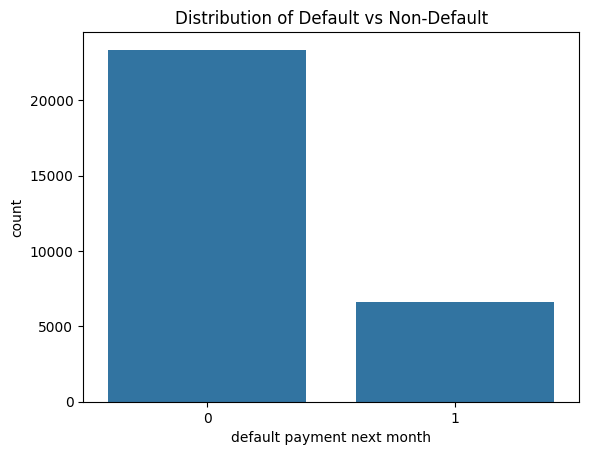

In [10]:
## Understanding distribution of target
sns.countplot(x="default payment next month", data=df)
plt.title("Distribution of Default vs Non-Default")
plt.show()

In [11]:
df["default payment next month"].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [12]:
df["default payment next month"].value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

The distribution of the target variable indicates a clear class imbalance, with a substantially higher number of non-default cases compared to default cases. This reflects a realistic credit risk scenario, where the majority of customers meet their repayment obligations while a smaller proportion default.

Such imbalance is important to consider, as a naive model that predicts all customers as non-default could still achieve high accuracy while failing to identify high-risk customers. Therefore, evaluation metrics beyond accuracy, such as precision, recall, F1-score, and ROC-AUC, are more appropriate for assessing model performance. In particular, recall is relevant for minimising missed default cases, which could result in financial loss for the institution.

### 2.3.1.2 Understanding distribution of features

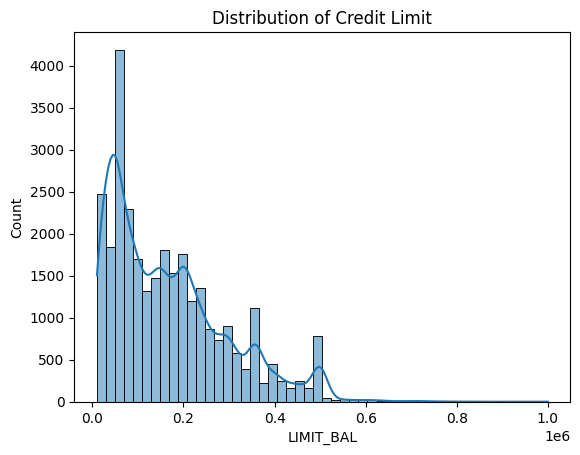

In [13]:
## Understanding distribution of features
sns.histplot(df['LIMIT_BAL'], bins=50, kde=True)
plt.title("Distribution of Credit Limit")
plt.show()


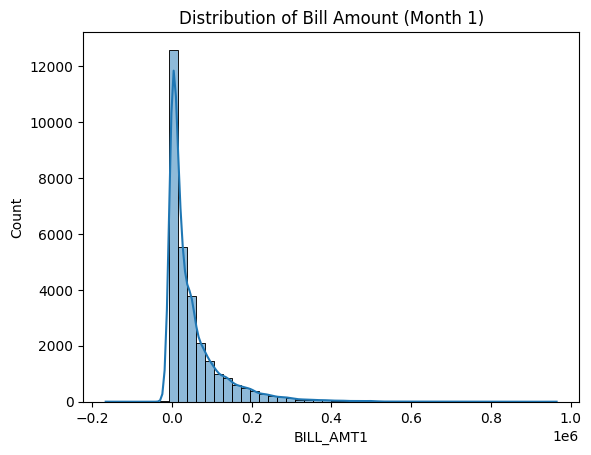

In [14]:
sns.histplot(df['BILL_AMT1'], bins=50, kde=True)
plt.title("Distribution of Bill Amount (Month 1)")
plt.show()

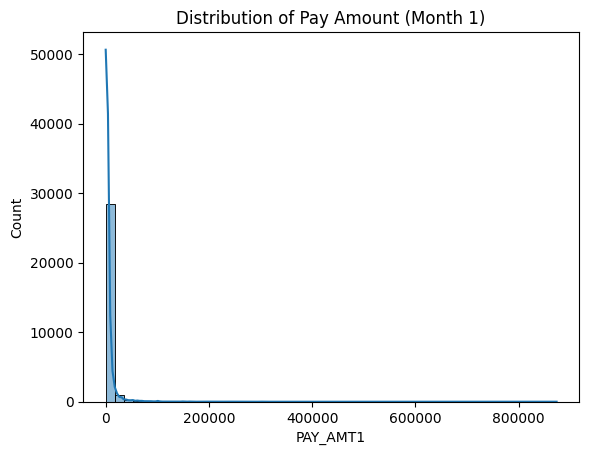

In [15]:
sns.histplot(df['PAY_AMT1'], bins=50, kde=True)
plt.title("Distribution of Pay Amount (Month 1)")
plt.show()

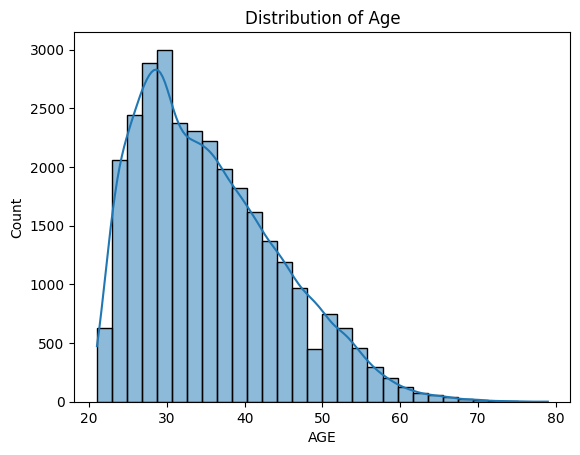

In [16]:
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.show()

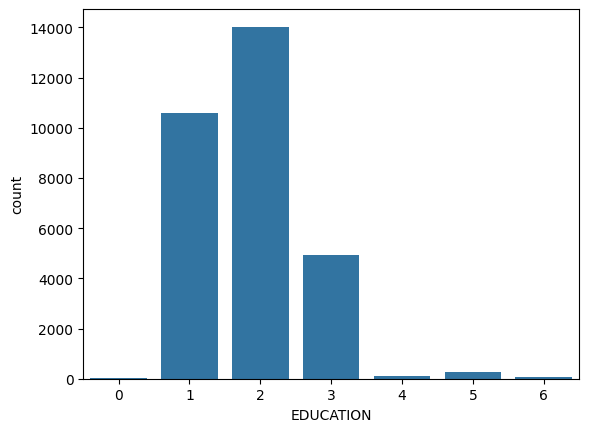

In [17]:
sns.countplot(x="EDUCATION", data=df)
plt.show()

The distributions of numerical features reveal distinct patterns across financial and demographic variables. Financial attributes such as credit limit (LIMIT_BAL), billing amounts (BILL_AMT*), and payment amounts (PAY_AMT*) exhibit strongly right-skewed distributions. This indicates that while most customers have relatively modest credit limits and transaction amounts, a small number of customers hold significantly larger values, resulting in long right tails.

These skewed distributions suggest that extreme values may disproportionately influence certain machine learning algorithms, particularly those sensitive to feature scale. In contrast, the age distribution is more concentrated and displays less skewness, reflecting a narrower range of customer ages.

Categorical demographic variables such as education level have unequal frequencies, indicating that some demographic groups are more prevalent than others within the dataset. Understanding these distributional characteristics is important for informing subsequent preprocessing and modelling decisions.

### 2.3.2 Understanding relationship between variables

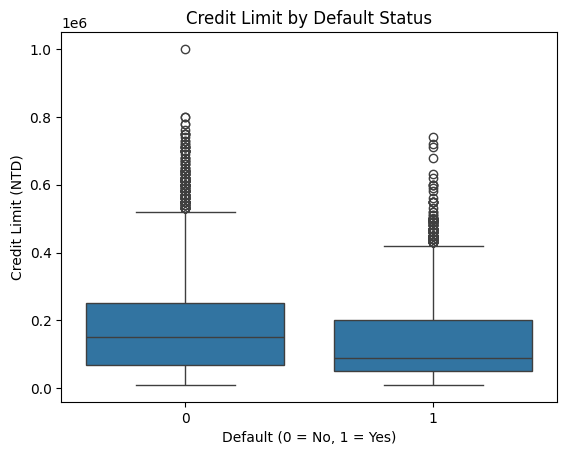

In [18]:
## Understanding relationship between variables
sns.boxplot(
    x="default payment next month",
    y="LIMIT_BAL",
    data=df
)
plt.title("Credit Limit by Default Status")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Credit Limit (NTD)")
plt.show()

The relationship between credit limit and default status reveals noticeable differences between defaulters and non-defaulters. Customers who default generally exhibit lower median credit limits compared to those who do not default. Additionally, the spread of credit limits among non-default customers is wider, suggesting greater financial capacity and flexibility. This indicates that credit limit may be a meaningful factor in distinguishing default risk, as customers with lower credit limits may be more financially constrained.

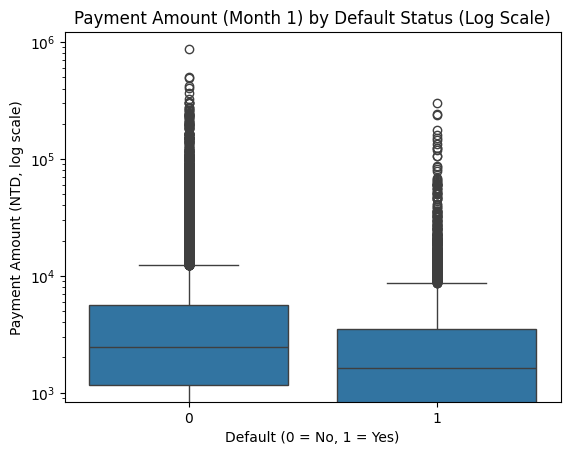

In [19]:
sns.boxplot(
    x="default payment next month",
    y="PAY_AMT1",
    data=df
)
plt.yscale("log")
plt.title("Payment Amount (Month 1) by Default Status (Log Scale)")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Payment Amount (NTD, log scale)")
plt.show()

To improve visual interpretability while preserving all observations, a logarithmic scale was applied to the y-axis. This transformation allows the central tendency and spread of payment amounts to be more clearly observed across default categories. After adjustment, customers who default are observed to have generally lower median payment amounts and a narrower distribution compared to non-default customers.

This pattern suggests that weaker repayment behaviour may be associated with a higher likelihood of default. As payment amounts directly reflect a customer’s ability or willingness to meet financial obligations, this feature appears to be a relevant indicator of default risk and warrants further consideration in subsequent modelling stages.

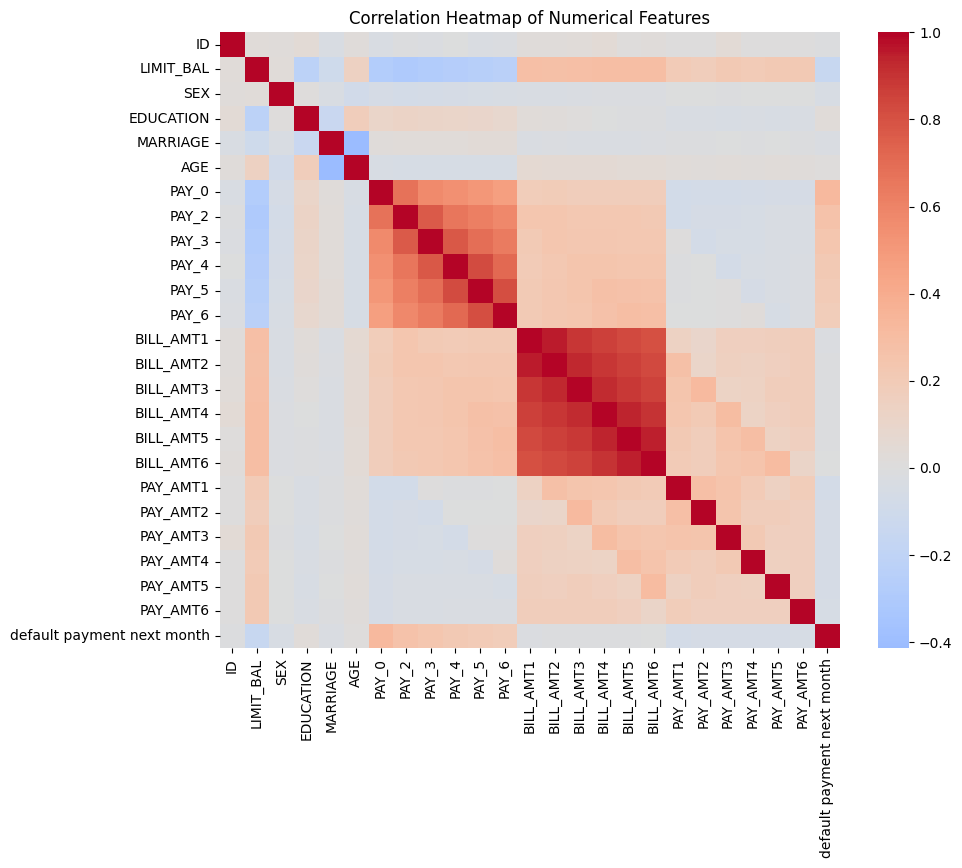

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

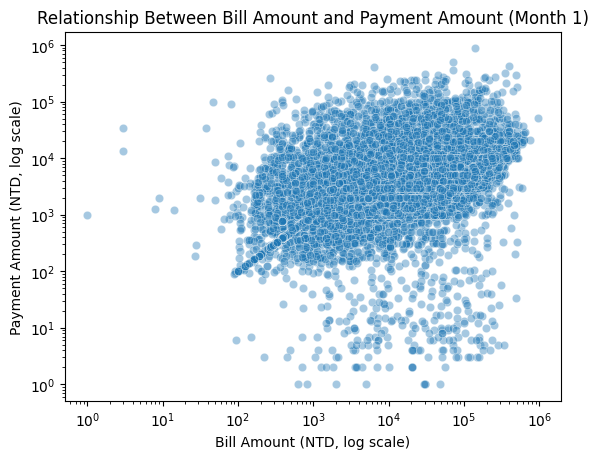

In [21]:
sns.scatterplot(
    x="BILL_AMT1",
    y="PAY_AMT1",
    data=df,
    alpha=0.4
)
plt.xscale("log")
plt.yscale("log")
plt.title("Relationship Between Bill Amount and Payment Amount (Month 1)")
plt.xlabel("Bill Amount (NTD, log scale)")
plt.ylabel("Payment Amount (NTD, log scale)")
plt.show()

The correlation heatmap reveals strong positive correlations among billing amounts (BILL_AMT1–BILL_AMT6) and among payment amounts (PAY_AMT1–PAY_AMT6) across different months. This indicates that customers’ spending and repayment behaviours are generally consistent over time, with higher bill amounts in one month often associated with higher bill amounts in subsequent months. Additionally, moderate positive correlations are observed between billing and payment variables, suggesting that customers with larger outstanding bills tend to make larger payments, although the strength of this relationship varies.

To further examine these relationships at a more detailed level, a scatter plot of billing amount versus payment amount for a representative month was analysed. The scatter plot confirms the pattern observed in the heatmap, showing an overall positive relationship between bill and payment amounts. However, the spread of points indicates substantial variability in repayment behaviour, particularly at higher bill amounts, where customers with similar bills may make significantly different payment amounts.

These findings suggest that billing and payment variables contain overlapping information and may introduce multicollinearity, which should be carefully considered in subsequent modelling and feature engineering stages.

# 3. Data Preparation

## 3.1 Data Cleaning and Pre-processing

Need to do:

1. Remove ID column
2. Replace invalid value
3. Rename columns for better readability
4. One Hot Encoding
5. Feature Engineering
6. Scaling due uneven ranges

In [22]:
## Clean data
df = df.drop(["ID"], axis=1)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
df["EDUCATION"] = df["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
df["MARRIAGE"] = df["MARRIAGE"].replace({0: 3})
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [24]:
df = df.rename(columns={
    "PAY_0": "PAY_SEP",
    "PAY_2": "PAY_AUG",
    "PAY_3": "PAY_JUL",
    "PAY_4": "PAY_JUN",
    "PAY_5": "PAY_MAY",
    "PAY_6": "PAY_APR",
    "default payment next month": "DEFAULT"
})

In [25]:
categorical_cols = ["SEX", "EDUCATION", "MARRIAGE"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [26]:
bill_cols = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]

df["BILL_TOTAL"] = df[bill_cols].sum(axis=1)
df["BILL_MEAN"]  = df[bill_cols].mean(axis=1)
df["BILL_STD"]   = df[bill_cols].std(axis=1)

pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

df["PAY_TOTAL"] = df[pay_amt_cols].sum(axis=1)
df["PAY_MEAN"]  = df[pay_amt_cols].mean(axis=1)

df["PAY_BILL_RATIO"] = df["PAY_TOTAL"] / (df["BILL_TOTAL"] + 1)

# Drop the original monthly columns after creating the engineered features
df_new = df.drop(bill_cols + pay_amt_cols, axis=1)
df_new

,LIMIT_BAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT,SEX_2,...,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,BILL_TOTAL,BILL_MEAN,BILL_STD,PAY_TOTAL,PAY_MEAN,PAY_BILL_RATIO
0,20000,24,2,2,-1,-1,-2,-2,1,True,...,False,False,False,False,7704,1284.000000,1761.633219,689,114.833333,0.089422
1,120000,26,-1,2,0,0,0,2,1,True,...,False,False,True,False,17077,2846.166667,637.967841,5000,833.333333,0.292774
2,90000,34,0,0,0,0,0,0,0,True,...,False,False,True,False,101653,16942.166667,6064.518593,11018,1836.333333,0.108387
3,50000,37,0,0,0,0,0,0,0,True,...,False,False,False,False,231334,38555.666667,10565.793518,8388,1398.000000,0.036259
4,50000,57,-1,0,-1,0,0,0,0,False,...,False,False,False,False,109339,18223.166667,10668.590074,59049,9841.500000,0.540049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,0,False,...,True,False,False,False,725349,120891.500000,86697.439530,42550,7091.666667,0.058661
29996,150000,43,-1,-1,-1,-1,0,0,0,False,...,True,False,True,False,21182,3530.333333,3200.534247,14490,2415.000000,0.684039
29997,30000,37,4,3,2,-1,0,0,1,False,...,False,False,True,False,70496,11749.333333,9354.149660,31300,5216.666667,0.443991
29998,80000,41,1,-1,0,0,0,-1,1,False,...,True,False,False,False,266611,44435.166667,32992.487323,147181,24530.166667,0.552042


To capture customer behaviour across multiple billing cycles while reducing redundancy, aggregated features were engineered from the monthly billing and payment variables. Total, mean, and standard deviation of billing amounts were computed to represent overall debt exposure, typical spending behaviour, and spending variability. Similarly, total and mean payment amounts were derived to summarise repayment behaviour over time.

In addition, a payment-to-bill ratio was introduced to quantify repayment adequacy relative to outstanding balances, providing a direct indicator of default risk. After feature aggregation, the original monthly billing and payment variables were removed to reduce multicollinearity and dimensionality, as these variables exhibited strong correlations and overlapping information. This approach results in a more compact and interpretable feature set for modelling.

Although extreme values were identified during exploratory analysis, they were retained during preprocessing as they represent genuine customer behaviour. Their influence was managed through feature scaling and model selection rather than value capping.

In [27]:
X = df_new.drop(columns=["DEFAULT"])
y = df_new["DEFAULT"]

## 3.2 Train-Test Split

In [28]:
## Split data into train set and test set
test_size = 0.3
random_state = 2025
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

The dataset was partitioned into training and test sets using a 70:30 split to enable robust model evaluation. The training set is used to learn model parameters, while the test set provides an unbiased estimate of model performance on unseen data.

Stratified sampling was applied during the split to preserve the original class distribution of the target variable in both sets. This is particularly important due to the imbalanced nature of credit default outcomes, as it ensures that both default and non-default cases are adequately represented during training and evaluation. A fixed random state was specified to ensure reproducibility of results across experiments.

| Dataset | Default = 1 |
|---------|------------|
| Original | 22% |
| Train | 22% |
| Test | 22% |

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature scaling was performed using standardisation to ensure that numerical features are on a comparable scale prior to model training. Standardisation transforms each feature to have a mean of zero and a standard deviation of one, preventing variables with larger numeric ranges from disproportionately influencing the model.

This step is particularly important for scale-sensitive algorithms such as Logistic Regression, where model coefficients are affected by feature magnitude. To avoid information leakage, the scaler was fitted exclusively on the training data and then applied to the test data using the same transformation parameters.

# 4. Modelling

### 4.2 Train Model

In [30]:
## Initialise and train model
logr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

In [31]:
logr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
logr.n_iter_

array([19], dtype=int32)

In [33]:
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(logr, f)

Logistic Regression was selected as the baseline classification model due to its simplicity, interpretability, and suitability for binary classification problems. It provides a strong reference point for evaluating more complex models in subsequent experiments.

The model was trained using the standardised training dataset to ensure numerical stability and fair contribution from all features. A higher max_iter value (1000) was specified to ensure convergence during optimisation, as the dataset contains multiple correlated financial features and class weighting was applied. The solver typically converges before reaching the maximum iterations.

To address the imbalanced nature of the target variable, class weighting was applied during training. This assigns a higher penalty to misclassified minority class (default) samples, encouraging the model to better identify default cases rather than favouring the majority class.

After training, the fitted model was saved for reuse during evaluation and deployment, ensuring consistency between model training and prediction stages.

# 5. Model Evaluation

In [36]:
## Evaluate model
y_pred_logr  = logr.predict(X_test_scaled)
y_prob_logr = logr.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred_logr))
print(confusion_matrix(y_test, y_pred_logr))
roc_auc_score(y_test, y_prob_logr)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7009
           1       0.38      0.65      0.48      1991

    accuracy                           0.69      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.69      0.71      9000

[[4913 2096]
 [ 694 1297]]


0.720750654303332

Logistic Regression was used as a baseline model to establish an interpretable reference for credit default prediction. Given the imbalanced nature of the dataset, class weighting was applied during training to reduce bias towards the majority non-default class. This encourages the model to place greater emphasis on correctly identifying default cases.

The model achieves a recall of 0.65 for the default class, indicating that approximately 65% of customers who eventually default are correctly identified. This is particularly important in a credit risk context, where failing to detect defaulters may lead to financial loss. However, this increased sensitivity results in lower precision, as some non-default customers are incorrectly classified as high risk, which is reflected in the confusion matrix.

While the overall accuracy is moderate at 0.69, accuracy alone is not an appropriate metric due to class imbalance. Instead, the ROC–AUC score of 0.72 provides a more meaningful assessment of model performance, demonstrating that the model is able to reasonably distinguish between defaulters and non-defaulters across different classification thresholds.

## Iterative model development


### Decision Tree

Logistic Regression was first used as a baseline model due to its simplicity, interpretability, and effectiveness for binary classification problems. While it provides a clear understanding of how individual features contribute to default risk, Logistic Regression assumes a linear relationship between the input features and the log-odds of default. This assumption limits its ability to capture complex interactions and non-linear patterns that may exist within customer financial behaviour.

To address this limitation, a Decision Tree classifier was evaluated as the next modelling iteration. Decision Trees are capable of learning non-linear decision boundaries and automatically modelling interactions between features, such as relationships between billing amounts, repayment behaviour, and variability in spending. This makes them particularly suitable for credit risk data, where default behaviour may arise from combinations of financial factors rather than isolated linear effects.

In addition, Decision Trees do not require feature scaling and are less sensitive to feature distributions, providing a useful contrast to Logistic Regression in terms of modelling assumptions. However, single Decision Trees are known to be prone to overfitting, especially when trained on datasets with many correlated financial features. Evaluating a Decision Tree at this stage therefore serves both to explore the benefits of non-linear modelling and to assess its limitations, motivating the subsequent use of ensemble methods for improved generalisation.

In [37]:
dt = DecisionTreeClassifier(
    random_state=2025,
    class_weight="balanced",
    max_depth=5,          # key
    min_samples_leaf=50   # stabilises the tree
)

In [38]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [39]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [40]:
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
roc_auc_score(y_test, y_prob_dt)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.57      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.70      0.68      9000
weighted avg       0.78      0.77      0.77      9000

[[5785 1224]
 [ 866 1125]]


0.760841822156044

In [41]:
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(dt, f)

Logistic Regression was first adopted as a baseline model due to its interpretability and relatively strong recall for default cases; however, its assumption of linear relationships limits its ability to accurately rank customers by varying levels of default risk.

Introducing a Decision Tree in the second iteration addresses this limitation by modelling non-linear relationships and interactions among financial features, resulting in an improvement in overall discriminatory performance, as reflected by an increase in ROC-AUC from 0.721 to 0.761 and a higher F1-score for the default class. These improvements indicate that the Decision Tree is better able to prioritise customers by default risk, which is essential in real-world credit decision-making where lending thresholds may be adjusted based on risk appetite and economic conditions rather than fixed binary rules.

Although the Decision Tree exhibits lower recall for default cases compared to Logistic Regression, this trade-off reflects a shift towards more precise identification of genuinely high-risk customers, reducing unnecessary rejection of creditworthy applicants. At the same time, the sensitivity of a single decision tree to data variability highlights the need for ensemble-based approaches in subsequent iterations to improve robustness and recall while preserving strong risk-ranking performance.

### Ensemble (Random Forest) and Hyperparameter Tuning

In [42]:
rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=2025,
    n_jobs=-1
)

In [43]:
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2", 0.5]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring="roc_auc",
    cv=5,
    random_state=2025,
    n_jobs=-1,
    verbose=1
)

In [44]:
rf_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...om_state=2025)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,2025
,error_score,nan


In [45]:
best_rf = rf_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
rf_auc = roc_auc_score(y_test, y_prob_rf)

rf_auc

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7009
           1       0.50      0.59      0.54      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.78      0.78      9000

[[5819 1190]
 [ 814 1177]]


0.7794944563992096

In the final modelling iteration, a Random Forest classifier was employed to address the instability and variance observed in the single Decision Tree model while retaining the ability to capture non-linear relationships. By aggregating multiple decorrelated trees, the Random Forest improves generalisation and produces more stable predictions on unseen data.

After hyperparameter tuning using RandomizedSearchCV with ROC-AUC as the optimisation metric, the Random Forest achieved the strongest overall performance among all evaluated models. In particular, the model attained a ROC-AUC of 0.779 on the test set, indicating improved ability to rank customers by default risk across varying decision thresholds. Compared to earlier iterations, the Random Forest also achieved a higher F1-score for the default class while recovering recall lost by the single Decision Tree model, demonstrating a more balanced trade-off between identifying high-risk customers and limiting false alarms.

From a credit risk perspective, this improved balance is critical, as it supports flexible risk-based decision-making where lending thresholds may be adjusted based on institutional risk appetite rather than fixed binary classifications. As such, the Random Forest model was selected as the final model due to its superior discriminatory power, robustness, and alignment with real-world credit decision requirements.

In [46]:
importances = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Keep top 15 features (simple, defensible rule)
top_features = importances.head(15).index
top_features

Index(['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MEAN', 'PAY_TOTAL',
       'BILL_STD', 'LIMIT_BAL', 'PAY_BILL_RATIO', 'BILL_MEAN', 'PAY_MAY',
       'BILL_TOTAL', 'PAY_APR', 'AGE', 'EDUCATION_2'],
      dtype='object')

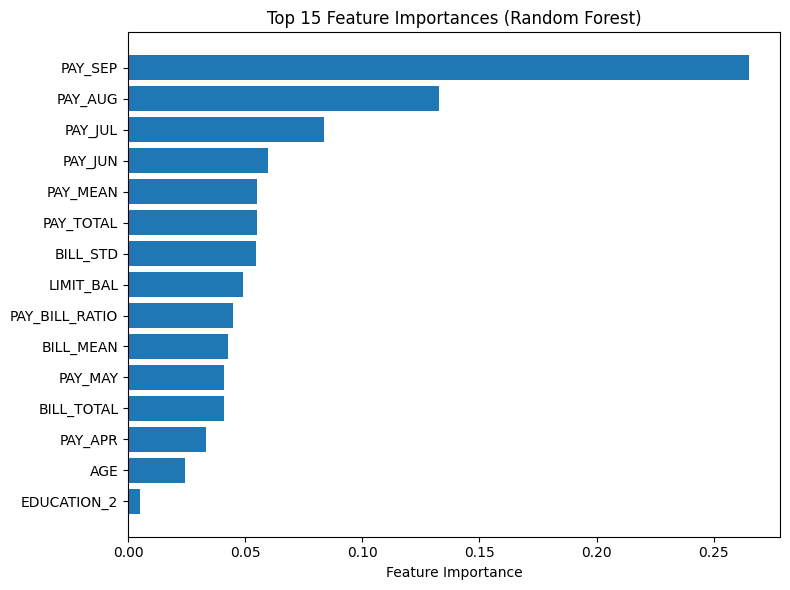

In [47]:
fi_df = importances.head(15).sort_values()

plt.figure(figsize=(8, 6))
plt.barh(fi_df.index, fi_df.values)
plt.xlabel("Feature Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

This figure illustrates the top 15 features selected based on Random Forest feature importance. Repayment behaviour variables dominate the ranking, highlighting the significance of recent payment patterns in predicting credit default. Aggregated repayment and billing statistics further contribute to model decisions, while customer profile variables provide secondary contextual information. This distribution supports the feature selection strategy and aligns with domain expectations that behavioural risk indicators are the strongest predictors of default.

In [48]:
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

rf_search.fit(X_train_sel, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestC...om_state=2025)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,2025
,error_score,nan


In [49]:
best_rf_sel = rf_search.best_estimator_

y_pred_sel = best_rf_sel.predict(X_test_sel)
y_prob_sel = best_rf_sel.predict_proba(X_test_sel)[:, 1]

print(classification_report(y_test, y_pred_sel))
print(confusion_matrix(y_test, y_pred_sel))
rf_sel_auc = roc_auc_score(y_test, y_prob_sel)

rf_sel_auc

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7009
           1       0.50      0.59      0.54      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.78      0.78      9000

[[5819 1190]
 [ 817 1174]]


0.778757010341658

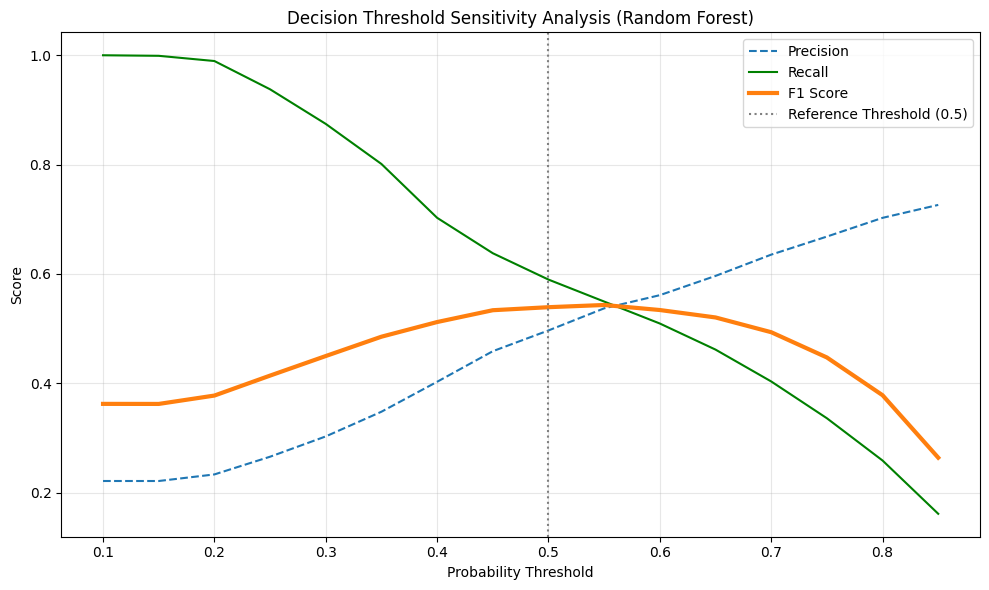

In [54]:
thresholds = np.arange(0.1, 0.9, 0.05)

precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred_t = (y_prob_sel >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_t))
    f1_scores.append(f1_score(y_test, y_pred_t))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", linestyle="--")
plt.plot(thresholds, recalls, label="Recall", color="green")
plt.plot(thresholds, f1_scores, label="F1 Score", linewidth=3)

plt.axvline(x=0.5, color="gray", linestyle=":", label="Reference Threshold (0.5)")
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.title("Decision Threshold Sensitivity Analysis (Random Forest)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The figure presents a decision threshold sensitivity analysis for the final Random Forest model, illustrating the trade-off between precision, recall, and F1-score as the probability threshold varies. At lower thresholds, recall is high, indicating that most default cases are correctly identified, but this comes at the expense of lower precision due to an increase in false positives. As the threshold increases, precision improves while recall declines, reflecting a more conservative decision policy that flags fewer customers as high risk. The F1-score peaks around a threshold slightly above 0.5, indicating a balanced trade-off between precision and recall. The reference threshold of 0.5 lies close to this peak, supporting its use for consistent model evaluation. Overall, the analysis demonstrates that the trained model can support different business risk appetites through threshold adjustment without retraining, reinforcing the relevance of ROC-AUC as the primary evaluation metric.

In [50]:
with open("rf_selected_features.pkl", "wb") as f:
    pickle.dump(list(top_features), f)

In [51]:
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(best_rf_sel, f)

Feature selection based on Random Forest importance revealed that recent repayment behaviour variables were the most influential predictors of credit default. Features such as monthly payment status indicators and aggregated repayment measures capture patterns of delayed or missed payments, which are strong signals of financial distress. This aligns with domain knowledge, as sustained repayment issues across multiple billing cycles significantly increase the likelihood of default.

In addition, features describing the relationship between payments and billed amounts, as well as billing magnitude and variability, were retained, reflecting the importance of both repayment capacity and spending stability in assessing default risk. Customer profile attributes, including credit limit, age, and education level, contributed secondary contextual information, supporting but not dominating the model’s decisions.

Overall, the selected feature set prioritises behavioural risk indicators over static demographic characteristics, improving interpretability while aligning closely with practical credit risk assessment processes used in financial institutions.

## Conclusion Across All Models

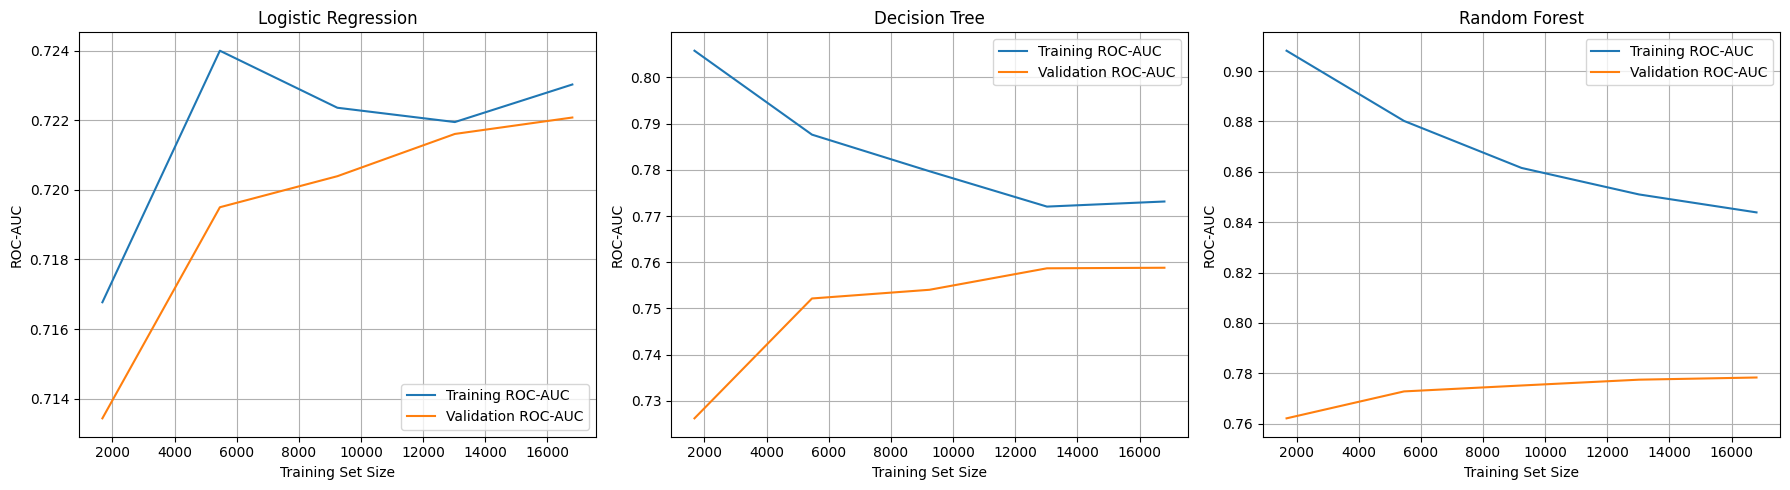

In [ ]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator,
        X,
        y,
        cv=5,
        scoring="roc_auc",
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, label="Training ROC-AUC")
    plt.plot(train_sizes, val_mean, label="Validation ROC-AUC")
    plt.xlabel("Training Set Size")
    plt.ylabel("ROC-AUC")
    plt.title(title)
    plt.legend()
    plt.grid(True)


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plot_learning_curve(logr, X_train, y_train, "Logistic Regression")

plt.subplot(1, 3, 2)
plot_learning_curve(dt, X_train, y_train, "Decision Tree")

plt.subplot(1, 3, 3)
plot_learning_curve(best_rf_sel, X_train_sel, y_train, "Random Forest")

plt.tight_layout()
plt.show()


This presents the learning curves for Logistic Regression, Decision Tree, and Random Forest models, illustrating training and validation ROC-AUC as the training set size increases. Logistic Regression exhibits underfitting, with both curves stabilising early at a relatively low ROC-AUC and remaining close together, indicating high bias and limited capacity to capture complex patterns. The Decision Tree shows higher variance, achieving strong training performance but consistently lower validation performance, with a persistent and unstable gap that suggests sensitivity to data variability. In contrast, the Random Forest demonstrates a well-balanced bias–variance trade-off (while the training and validation curves do not intersect, both stabilise as data increases and maintain a consistent, moderate gap at a higher ROC-AUC). This stable separation indicates effective generalisation rather than overfitting, providing visual evidence that the Random Forest is the most well-fitted model among the three.

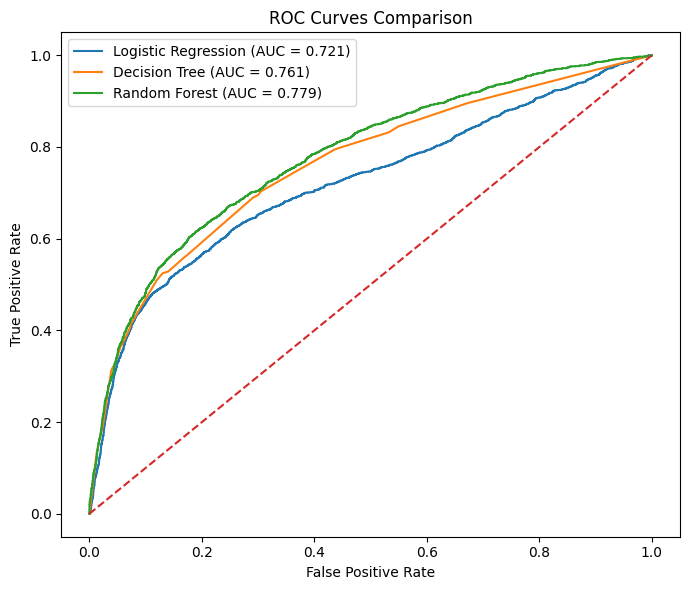

In [58]:
models = {
    "Logistic Regression": (y_prob_logr, y_test),
    "Decision Tree": (y_prob_dt, y_test),
    "Random Forest": (y_prob_sel, y_test)
}

plt.figure(figsize=(7, 6))

for name, (y_prob, y_true) in models.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.tight_layout()
plt.show()


| Model	| ROC-AUC | Recall (Default = 1) | Precision (Default = 1) | F1-Score (Default = 1)	| Accuracy |
|-------|---------|----------------------|-------------------------|------------------------|----------|
| Logistic Regression | 0.721 | 0.65 | 0.38 | 0.48 | 0.69 |
| Decision Tree | 0.761 | 0.57 | 0.48 | 0.52 | 0.77 |
| Random Forest (RS + Feature Selection) | 0.779 | 0.59 | 0.50 | 0.54 | 0.78 |

Three classification models were evaluated to predict credit default risk: Logistic Regression as a baseline, a Decision Tree to capture non-linear relationships, and a tuned Random Forest with feature selection as the final model. Performance was assessed on a held-out test set using ROC-AUC, recall, and F1-score for the default class to reflect the business objective of effective risk identification.

Logistic Regression provided a strong and interpretable baseline, achieving relatively high recall for default cases (0.65), indicating a conservative approach that flags a larger proportion of high-risk customers. However, its lower ROC-AUC (0.721) suggests limited ability to accurately rank customers by varying levels of default risk, which constrains its usefulness in risk-based lending decisions that require flexible thresholds.

The Decision Tree improved overall discriminatory performance, increasing ROC-AUC to 0.761 and achieving a higher F1-score for the default class. This demonstrates the benefit of modelling non-linear interactions between repayment behaviour and billing patterns. Nevertheless, the Decision Tree exhibited reduced recall for default cases and remains sensitive to data variability, highlighting the limitations of relying on a single tree for robust credit risk assessment.

The final model, a Random Forest tuned using RandomizedSearchCV and refined through feature selection, achieved the strongest overall performance. It recorded the highest ROC-AUC (0.779) and the best balance between precision and recall for the default class, resulting in the highest F1-score among the evaluated models. By aggregating multiple decorrelated decision trees, the Random Forest reduced variance while preserving non-linear modelling capability, leading to more stable and generalisable predictions.

From a business perspective, the Random Forest model best aligns with real-world credit risk management needs. Its superior risk-ranking ability supports flexible decision thresholds, enabling financial institutions to balance the cost of missed defaults against the impact of unnecessarily rejecting creditworthy customers. Consequently, the tuned Random Forest with selected features was chosen as the final model for credit default prediction.